<a href="https://colab.research.google.com/github/Samortchy/personal-AI-projects/blob/main/heart-dieases-classfication/heart-dieases-classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyswarm

In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from pyswarm import pso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# **Data Exploration & Visualization**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/machine learning /Classfication/train data.csv')
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,27,Female,O-,Asthma,06/06/2022,Mark Hartman Jr.,Sons and Miller,Cigna,2625.980554,379,Elective,18/08/2022,Ibuprofen,Normal
1,2,LesLie TErRy,68,Female,O-,Cancer,19/11/2021,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,20/11/2021,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,21,Female,A+,Hypertension,05/03/2022,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,16/05/2022,Paracetamol,Normal
3,4,andrEw waTtS,91,Male,AB-,Diabetes,06/04/2020,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,26/04/2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,52,Female,A+,Diabetes,31/12/2022,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,11/02/2023,Penicillin,Abnormal


In [ ]:
df.shape

(50000, 16)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.columns)

Index(['ID', 'Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [ ]:
df.describe()

,ID,Age,Billing Amount,Room Number
count,50000.000000,50000.000000,49276.000000,50000.000000
mean,25000.500000,45.863700,5397.314987,282.999980
std,14433.901067,24.416119,3240.601901,109.993534
min,1.000000,0.000000,-995.211704,50.000000
25%,12500.750000,26.000000,2645.811489,203.000000
50%,25000.500000,45.000000,5313.507889,286.000000
75%,37500.250000,65.000000,8027.205893,370.000000
max,50000.000000,100.000000,12635.764460,500.000000


In [ ]:
for col in df.columns:
  print(col, "\n", df[col].unique(),
        df[col].value_counts(dropna = False),
        "\nlength of unique values:",len(df[col].unique()),
        "\n\n")

ID 
 [    1     2     3 ... 49998 49999 50000] ID
49984    1
49983    1
49982    1
49981    1
49980    1
        ..
5        1
4        1
3        1
2        1
1        1
Name: count, Length: 50000, dtype: int64 
length of unique values: 50000 


Name 
 ['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer'] Name
DAvId muNoZ          2
PAUL SMith           2
DAniEl sMIth         2
TInA white           2
LOrI coOK            2
                    ..
NanCY DAughERtY      1
ryaN moss            1
MERcEdes garCIa      1
RebECCA VelAzQUEZ    1
dAnieLlE hARVEY      1
Name: count, Length: 49992, dtype: int64 
length of unique values: 49992 


Age 
 [ 27  68  21  91  52  29  58  53  56  80  66  36  32  74   6  86  99  34
  82  55   4  17  28  64  71  25  47  39  37   2  61  33  78  63  84  70
  76  22  18   8  15  94  45  31  72  19  16  26  43  23  65  35  85   3
   7  40  73   0   5  24  97  11   1   9  41  38  46  12  14  13  51  79
  60  89  5

In [ ]:
negative_billing_amount = df[df['Billing Amount'] <= 0]
print(len(negative_billing_amount))

247


In [ ]:
duplicate_names_df = df[df.duplicated(subset='Name', keep=False)]
duplicate_names_df

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
2491,2492,DAvId muNoZ,16,Male,B-,Cancer,23/07/2019,Miguel Parker,and Sons Smith,Cigna,NaN,184,Emergency,17/08/2019,Penicillin,Inconclusive
3589,3590,DAniEl sMIth,21,Female,B-,Asthma,13/08/2022,Tara Moreno,"Torres, and Harrison Jones",Medicare,6540.535871,289,Emergency,08/09/2022,Penicillin,Normal
3841,3842,LOrI coOK,48,Male,A-,Cancer,07/03/2020,Megan Hahn,Garner-Bowman,Aetna,8323.995920,457,Urgent,12/03/2020,Ibuprofen,Abnormal
6432,6433,TInA white,55,Male,A+,Asthma,29/12/2019,Cindy Ellis,Sons Rich and,Cigna,7663.598189,351,Urgent,30/12/2019,Aspirin,Inconclusive
8224,8225,ADAM OrR,30,Female,B-,Asthma,17/03/2020,Kathleen Hanna,Cline-Williams,Cigna,6905.098362,187,Urgent,11/05/2020,Ibuprofen,Inconclusive
20122,20123,PAUL SMith,54,Male,B-,Arthritis,23/11/2022,Jacob Daniel,"and Howell Brooks, Rogers",Blue Cross,3125.159184,414,Urgent,23/11/2022,Penicillin,Abnormal
22017,22018,TInA white,68,Female,B+,Obesity,15/02/2024,John Hartman,Espinoza-Stone,Cigna,10469.141480,116,Elective,03/04/2024,Ibuprofen,Normal
27042,27043,LOrI coOK,65,Male,B-,Diabetes,21/07/2021,Phillip Williams,LLC Martin,Aetna,4651.434105,240,Elective,21/08/2021,Aspirin,Inconclusive
36015,36016,aMy smiTh,77,Male,O-,Cancer,14/01/2023,Emily Taylor,Wilson Group,Aetna,12113.307380,379,Emergency,03/02/2023,Penicillin,Normal
40470,40471,aMy smiTh,43,Male,A+,Hypertension,17/09/2022,Travis Parsons,Group Middleton,Cigna,2390.193061,275,Emergency,03/11/2022,Aspirin,Inconclusive


In [ ]:
for condtion in df['Medical Condition'].unique():
  print(condtion, "\n")
  zero_age_records = df[(df['Age'] == 0) & (df['Medical Condition'] == condtion)]
  print(zero_age_records[['Age', 'Medical Condition']], "\n"
  , "\nlength of unique values:",len(zero_age_records))



Asthma 

       Age Medical Condition
86       0            Asthma
720      0            Asthma
1288     0            Asthma
2159     0            Asthma
3113     0            Asthma
...    ...               ...
46803    0            Asthma
47808    0            Asthma
48491    0            Asthma
49186    0            Asthma
49327    0            Asthma

[105 rows x 2 columns] 
 
length of unique values: 105
Cancer 

       Age Medical Condition
175      0            Cancer
3089     0            Cancer
5908     0            Cancer
9972     0            Cancer
13180    0            Cancer
13676    0            Cancer
17766    0            Cancer
20065    0            Cancer
20595    0            Cancer
21328    0            Cancer
25988    0            Cancer
26175    0            Cancer
29367    0            Cancer
29410    0            Cancer
35112    0            Cancer
37360    0            Cancer
44011    0            Cancer
46579    0            Cancer
49747    0            Cance

In [ ]:
nan_rows = df[df.isna().any(axis=1)]

for idx, row in nan_rows.iterrows():
      if row.isna().all():
        print(f"Row at index {idx} has all NaN values")

print(f"Total rows with NaN values: {len(nan_rows)}")

Total rows with NaN values: 5833


In [ ]:
df[-5500:].head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
44500,44501,sARa brooKS,49,Female,O-,Diabetes,29/01/2020,Daniel Shelton,"Hernandez Rogers and Vang,",Cigna,9439.819725,219,Urgent,17/04/2020,Penicillin,Inconclusive
44501,44502,mR. TRaVIS hAyEs,29,Male,B-,Cancer,18/09/2020,Stephanie Kramer,"Powers Miller, and Flores",Aetna,11859.747350,269,Urgent,22/10/2020,Penicillin,Normal
44502,44503,bRadLEy stRiCKLAnd,30,Female,B-,Cancer,09/09/2021,Angela Contreras,Nunez-Humphrey,Blue Cross,6303.256805,241,Emergency,13/09/2021,Ibuprofen,Abnormal
44503,44504,DebOrAH jACKsoN,79,Female,A-,Hypertension,28/01/2022,Miguel Parker,Lyons-Blair,Blue Cross,7933.425367,249,Elective,26/04/2022,Aspirin,Normal
44504,44505,mARissa HuRLEy,92,Male,O-,Obesity,30/12/2024,Elizabeth Morales,"and Garcia Morris Cunningham,",Blue Cross,84.004415,399,Emergency,21/02/2025,Ibuprofen,Abnormal


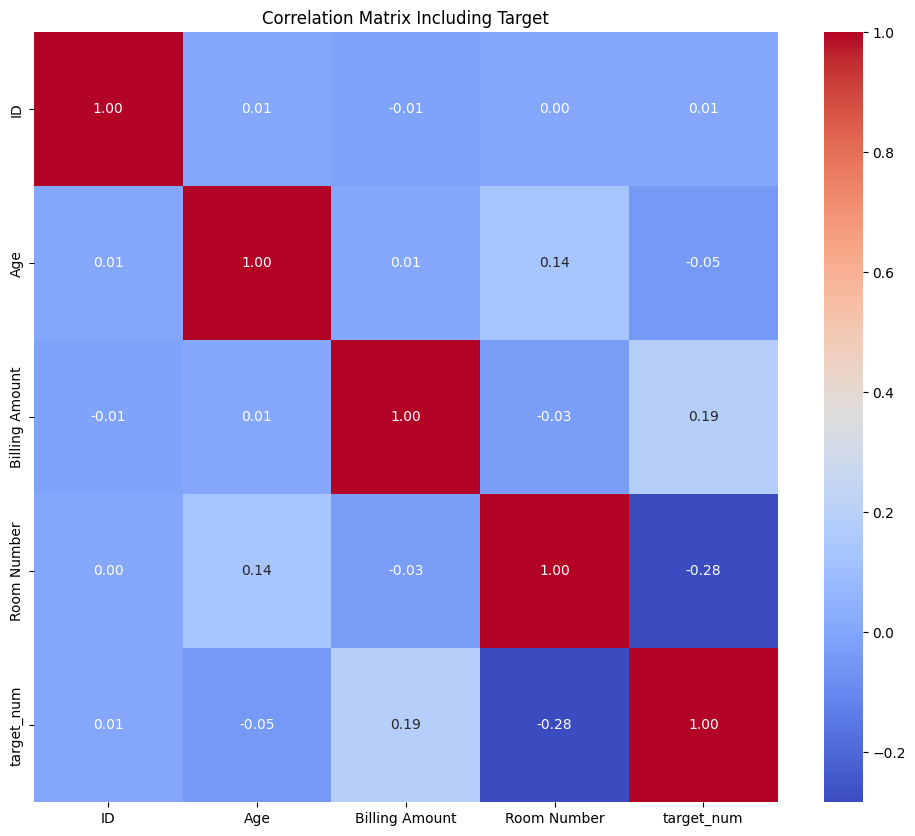

In [ ]:
df['target_num'] = df['Test Results'].astype('category').cat.codes

correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Target')
plt.show()


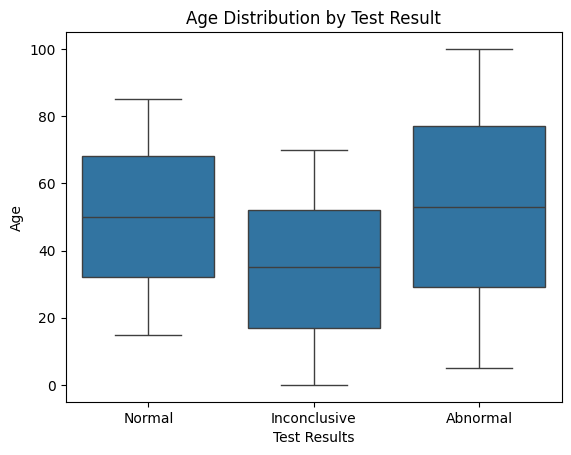

In [ ]:
sns.boxplot(x='Test Results', y='Age', data=df)
plt.title('Age Distribution by Test Result')
plt.show()

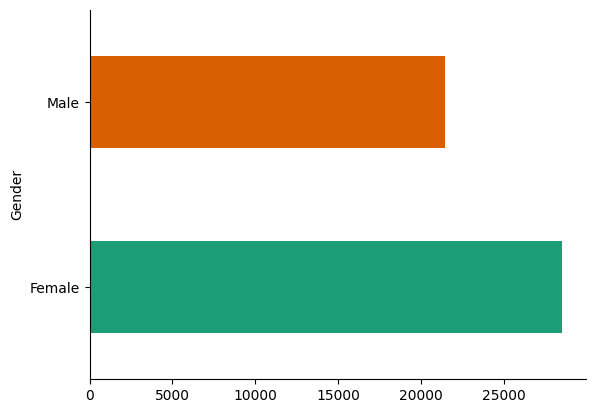

In [ ]:
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

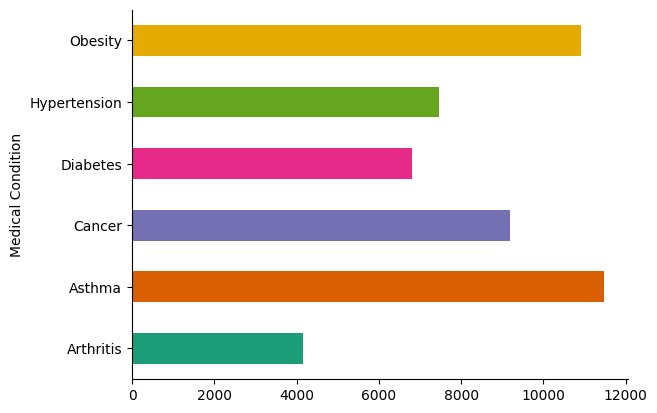

In [ ]:
df.groupby('Medical Condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

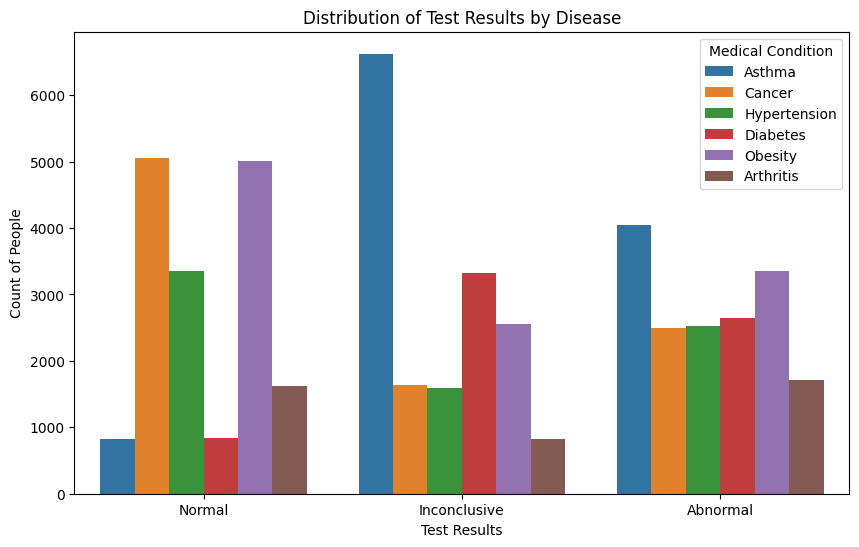

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Test Results', hue='Medical Condition', data=df)

plt.xlabel('Test Results')
plt.ylabel('Count of People')
plt.title('Distribution of Test Results by Disease')

plt.show()

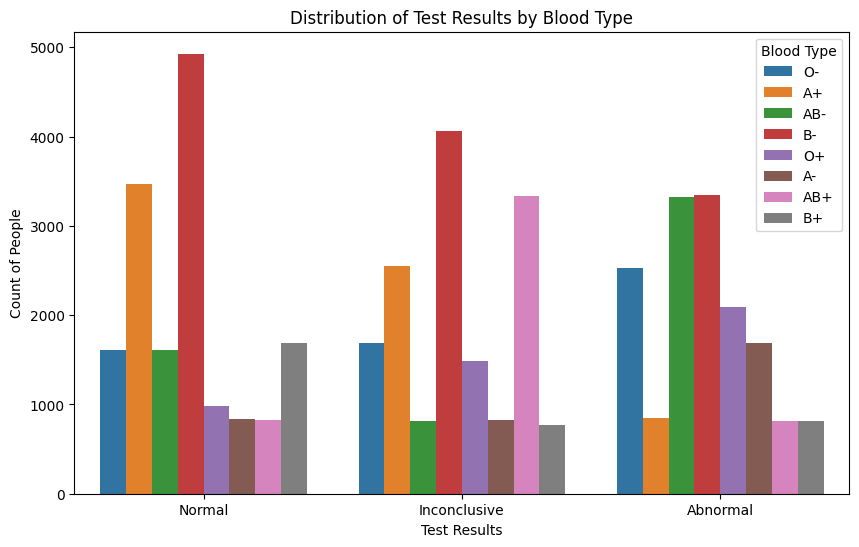

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Test Results', hue='Blood Type', data=df)

plt.xlabel('Test Results')
plt.ylabel('Count of People')
plt.title('Distribution of Test Results by Blood Type')

plt.show()

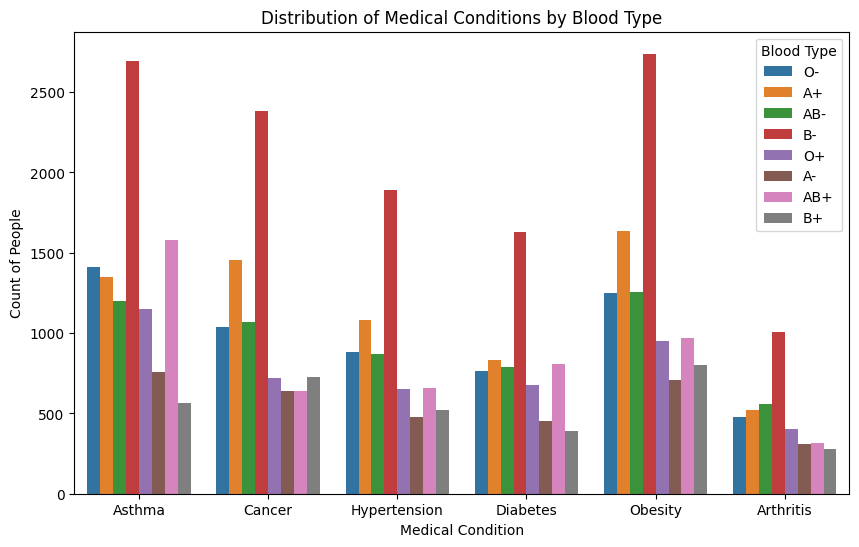

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Medical Condition', hue='Blood Type', data=df)

plt.xlabel('Medical Condition')
plt.ylabel('Count of People')
plt.title('Distribution of Medical Conditions by Blood Type')

plt.show()

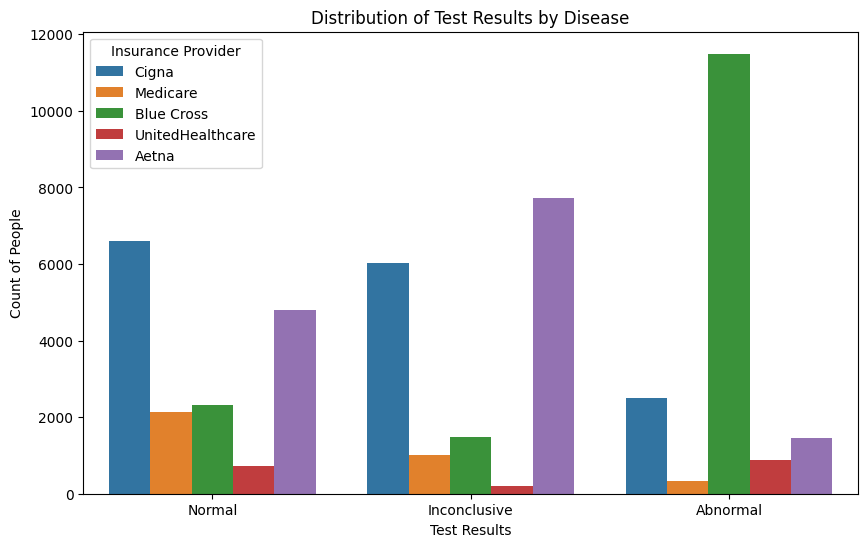

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Test Results', hue='Insurance Provider', data=df)

plt.xlabel('Test Results')
plt.ylabel('Count of People')
plt.title('Distribution of Test Results by Disease')

plt.show()

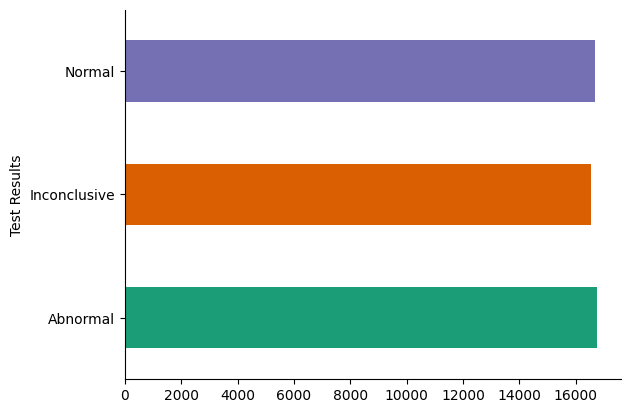

In [ ]:
df.groupby('Test Results').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=['float64']).columns)

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')
Index(['Billing Amount'], dtype='object')


# **Preprocessing & Data-cleaning**

In [ ]:
 # @title dropping Nan rows

# df.drop(df.index[-5500:], inplace = True)

# nan_rows = df[df.isna().any(axis=1)]

# print(f"Total rows with NaN values: {len(nan_rows)}")

In [ ]:
# @title features that will be dropped

features_to_drop = ['ID', 'Name', 'Room Number', 'Insurance Provider', 'Doctor', 'Hospital'] #'Billing Amount',

df.drop(features_to_drop, axis=1, inplace=True)

df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,target_num
0,27,Female,O-,Asthma,06/06/2022,2625.980554,Elective,18/08/2022,Ibuprofen,Normal,2
1,68,Female,O-,Cancer,19/11/2021,1471.387317,Elective,20/11/2021,Ibuprofen,Inconclusive,1
2,21,Female,A+,Hypertension,05/03/2022,5131.488104,Emergency,16/05/2022,Paracetamol,Normal,2
3,91,Male,AB-,Diabetes,06/04/2020,8972.793157,Urgent,26/04/2020,Ibuprofen,Abnormal,0
4,52,Female,A+,Diabetes,31/12/2022,2015.522684,Emergency,11/02/2023,Penicillin,Abnormal,0


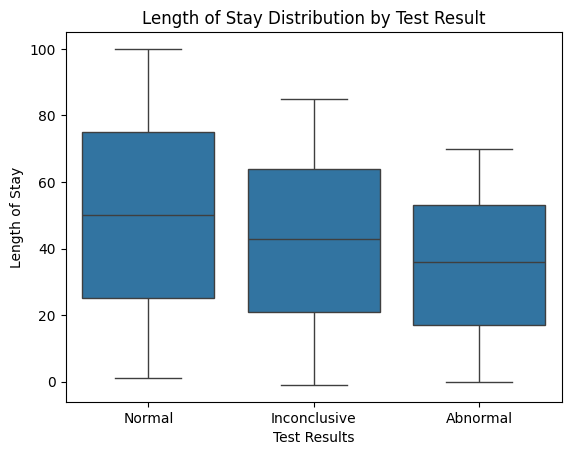

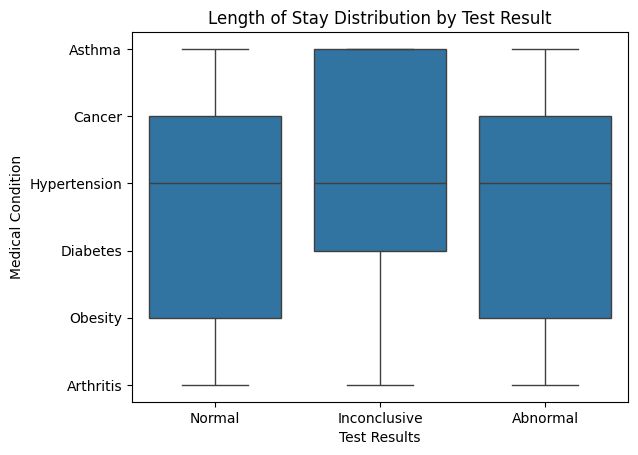

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,target_num,Length of Stay
0,27,Female,O-,Asthma,2625.980554,Elective,Ibuprofen,Normal,2,73
1,68,Female,O-,Cancer,1471.387317,Elective,Ibuprofen,Inconclusive,1,1
2,21,Female,A+,Hypertension,5131.488104,Emergency,Paracetamol,Normal,2,72
3,91,Male,AB-,Diabetes,8972.793157,Urgent,Ibuprofen,Abnormal,0,20
4,52,Female,A+,Diabetes,2015.522684,Emergency,Penicillin,Abnormal,0,42


In [ ]:
# @title driving the length of the stay from the date of admission and discharge date

def patient_stay_length(df):
    df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True, errors='coerce')
    df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True, errors='coerce')

    df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
    # df['Weekend Admission'] = df['Date of Admission'].dt.weekday >= 5
    # df['Admission Month'] = df['Date of Admission'].dt.month
    # df['Admission Quarter'] = df['Date of Admission'].dt.quarter
    # df['Admission Year'] = df['Date of Admission'].dt.year
    # df['Same Day Discharge'] = df['Length of Stay'] == 0

    df.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)


patient_stay_length(df)

sns.boxplot(x='Test Results', y='Length of Stay', data=df)
plt.title('Length of Stay Distribution by Test Result')
plt.show()

sns.boxplot(x='Test Results', y='Medical Condition', data=df)
plt.title('Length of Stay Distribution by Test Result')
plt.show()
#checking that there is no negative values (i.e wrong data)
# print(df['Length of Stay'].unique())
# print(df['Weekend Admission'].unique())
# print(df['Same Day Discharge'].unique())
df.head()

In [ ]:
# @title handling the missing values in the selected features
print(df[['Blood Type', 'Medical Condition', 'Medication', 'Age', 'Length of Stay']].isna().sum())

def impute_nan():
  df['Blood Type'].fillna(df['Blood Type'].mode()[0], inplace=True)
  df['Medical Condition'].fillna(df['Medical Condition'].mode()[0], inplace=True)
  df['Medication'].fillna(df['Medication'].mode()[0], inplace=True)
  df['Age'].fillna(df['Age'].median(), inplace=True)
  df['Length of Stay'].fillna(df['Length of Stay'].median(), inplace=True)

#impute_nan()

Blood Type           3065
Medical Condition       0
Medication              0
Age                     0
Length of Stay          0
dtype: int64


In [ ]:
# @title handling the missing values in the age feature

#implementing the custom imputer to add it to my pipeline
class GroupMedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_col, target_col):
        self.group_col = group_col
        self.target_col = target_col
        self.medians = None

    def fit(self, X, y=None):
        # Store medians for each group
        self.medians = X.groupby(self.group_col)[self.target_col].median()
        return self

    def transform(self, X):
        X = X.copy()
        X[self.target_col] = X[self.target_col].replace(0, np.nan)
        # Fill with group-wise medians
        X[self.target_col] = X.apply(
            lambda row: self.medians[row[self.group_col]] if pd.isna(row[self.target_col]) else row[self.target_col],
            axis=1
        )
        return X

group_imputer = GroupMedianImputer(group_col='Medical Condition', target_col='Age')

df['Age'] = df['Age'].replace(0, np.nan)

'''we decided to drop them instead since they are less than 250 records'''
df['Age'] = df['Age'].dropna()


In [ ]:
# @title mapping the age to age groups instead

# def age_to_group(df):

#   bins = [0, 12, 19, 35, 60, 100]
#   labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

#   df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#   df.drop('Age', axis=1, inplace=True)

# age_to_group(df)

# print(df['Age Group'].unique())
# df.head()

In [ ]:
# @title handling the -ve values in the billing amount

df = df[df['Billing Amount'] > 0]

In [ ]:
# @title impuation by the mode of the blood type with respect to the target

class GroupModeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target_col, group_col):
        self.target_col = target_col
        self.group_col = group_col
        self.fill_map = {}

    def fit(self, X, y=None):
        df = X.copy()
        self.fill_map = df.groupby(self.group_col)[self.target_col]\
                          .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')\
                          .to_dict()
        return self

    def transform(self, X):
        df = X.copy()
        df[self.target_col] = df.apply(
            lambda row: self.fill_map.get(row[self.group_col], 'Unknown')
            if pd.isnull(row[self.target_col]) else row[self.target_col],
            axis=1
        )
        return df

#df = group_imputer.fit_transform(df)

In [ ]:
# @title impuation of the blood type by the mode and the second mode with a specific probability

class DualModeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target_col, prob_second=0.3):
        self.target_col = target_col
        self.prob_second = prob_second
        self.top_values = []

    def fit(self, X, y=None):
        # X can be a DataFrame or array with the target column
        if isinstance(X, pd.DataFrame):
            series = X[self.target_col]
        elif isinstance(X, pd.Series):
            series = X
        else:
            series = pd.Series(X)

        modes = series.mode()
        if len(modes) >= 2:
            self.top_values = [modes[0], modes[1]]
        elif len(modes) == 1:
            self.top_values = [modes[0], modes[0]]
        else:
            self.top_values = ['Unknown', 'Unknown']
        return self

    def transform(self, X):
        X = X.copy()
        if isinstance(X, pd.DataFrame):
            mask = X[self.target_col].isnull()
            num_missing = mask.sum()
            if num_missing > 0:
                fill_values = np.where(
                    np.random.rand(num_missing) < self.prob_second,
                    self.top_values[1],
                    self.top_values[0]
                )
                X.loc[mask, self.target_col] = fill_values
            return X
        elif isinstance(X, pd.Series):
            mask = X.isnull()
            num_missing = mask.sum()
            if num_missing > 0:
                fill_values = np.where(
                    np.random.rand(num_missing) < self.prob_second,
                    self.top_values[1],
                    self.top_values[0]
                )
                X.loc[mask] = fill_values
            return X
        else:
            raise ValueError("Input should be a pandas DataFrame or Series")

''' could cause data leakge'''
imputer = DualModeImputer(target_col='Blood Type', prob_second=0.3)
#df = imputer.fit_transform(df)


In [ ]:
# @title label encoding for the target

le = LabelEncoder()
df['Test Results'] = le.fit_transform(df['Test Results'])

df['Is_Inconclusive'] = df['Test Results'].apply(lambda x: 1 if x == 1 else 0)

df.head()

<ipython-input-36-ea539c80b732>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Test Results'] = le.fit_transform(df['Test Results'])
<ipython-input-36-ea539c80b732>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Inconclusive'] = df['Test Results'].apply(lambda x: 1 if x == 1 else 0)


,Age,Gender,Blood Type,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,target_num,Length of Stay,Is_Inconclusive
0,27.0,Female,O-,Asthma,2625.980554,Elective,Ibuprofen,2,2,73,0
1,68.0,Female,O-,Cancer,1471.387317,Elective,Ibuprofen,1,1,1,1
2,21.0,Female,A+,Hypertension,5131.488104,Emergency,Paracetamol,2,2,72,0
3,91.0,Male,AB-,Diabetes,8972.793157,Urgent,Ibuprofen,0,0,20,0
4,52.0,Female,A+,Diabetes,2015.522684,Emergency,Penicillin,0,0,42,0


In [ ]:
# @title target encoding for other cat. features

#target_encoder = ce.TargetEncoder(cols=['Doctor', 'Hospital'])

#target_encoder = ce.TargetEncoder(cols=['Hospital', 'Doctor'])

#Fit the encoder on the data and transform the specified columns
#df[['Hospital', 'Doctor']] = target_encoder.fit_transform(df[['Hospital', 'Doctor']], df['Test Results'])

categorical_target_encoded = ['Doctor']

In [ ]:
# @title ordinal encoding for emergency feature

ordinal_encoder = OrdinalEncoder(categories=[['Elective', 'Urgent', 'Emergency']])

ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', ordinal_encoder)
])

In [ ]:
# @title one-hot encoding for cat. features, standard scaler for numerical features, minMax scaler fornumeric features in NB

categorical_features = ['Gender', 'Medical Condition', 'Medication', 'Blood Type'] #, 'Age Group']


cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat', OneHotEncoder(drop = 'first', sparse_output=False, handle_unknown='ignore'))
])

num_pipeline = Pipeline(steps=[
    #('dual_mode_imputer', dual_mode_imputer),
    #('group_imputer', group_imputer),
    #('group_median_imputer', group_imputer),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

nb_num_pipeline = Pipeline(steps=[
    #('dual_mode_imputer', dual_mode_imputer),
    #('group_imputer', group_imputer),
    #('group_median_imputer', group_imputer),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_pipeline, ['Admission Type']),
        ('cat', cat_pipeline, categorical_features),
        ('num', num_pipeline, ['Length of Stay' , 'Age', 'Billing Amount'])

    ],
)

#preprocessor for naive bayes
nb_preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_pipeline, ['Admission Type']),
        ('cat', cat_pipeline, categorical_features),
        ('num', nb_num_pipeline, ['Length of Stay', 'Age', 'Billing Amount'])

    ],
)

# **Data Splitting**

In [ ]:
# Separate features and target
X = df.drop(['Test Results','Is_Inconclusive'], axis=1)
y = df['Test Results']

# Split into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Separate features and target
X_inconclusive = df.drop(['Test Results','Is_Inconclusive'], axis=1)
y_inconclusive = df['Is_Inconclusive']

# Split into train (70%), validation (15%), and test (15%)
X_inconclusive_train, X_inconclusive_temp, y_inconclusive_train, y_inconclusive_temp = train_test_split(X_inconclusive, y_inconclusive, test_size=0.3, random_state=42)
X_inconclusive_val, X_inconclusive_test, y_inconclusive_val, y_inconclusive_test = train_test_split(X_inconclusive_temp, y_inconclusive_temp, test_size=0.5, random_state=42)

In [ ]:
# Separate features and target
X_conclusive = df[df['Test Results'] != 'Inconclusive'].drop(['Test Results', 'Is_Inconclusive'], axis=1)
y_conclusive = df[df['Test Results'] != 'Inconclusive']['Test Results']

# Split into train (70%), validation (15%), and test (15%)
X_conclusive_train, X_conclusive_temp, y_conclusive_train, y_conclusive_temp = train_test_split(X_conclusive, y_conclusive, test_size=0.3, random_state=42)
X_conclusive_val, X_conclusive_test, y_conclusive_val, y_conclusive_test = train_test_split(X_conclusive_temp, y_conclusive_temp, test_size=0.5, random_state=42)

# **Classfication Models**

## **Logistic Regression**

In [ ]:
# @title Helper functions

def model_evaluation(pipeline, X_train, y_train, X_val, y_val, X_test, y_test):
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  return y_pred

def pipeline(preprocessor, classifier):
  pipeline = Pipeline(steps=[
      ('preprocessing', preprocessor),
      ('classifier', classifier)
  ])
  return pipeline

def model_report(y_train_pred, y_val_pred, y_test_pred, y_train=y_train, y_val=y_val, y_test=y_test):

  # Reports
  print("🔹 Classification Report - Training Data:")
  print(classification_report(y_train, y_train_pred, target_names=le.classes_))

  print("\n🔹 Classification Report - Validation Data:")
  print(classification_report(y_val, y_val_pred, target_names=le.classes_))

  print("\n🔹 Classification Report - Test Data:")
  print(classification_report(y_test, y_test_pred, target_names=le.classes_))

In [ ]:

def logistic_regression():
  pipeline = Pipeline(steps=[
      ('preprocessing', preprocessor),
      ('classifier', LogisticRegression(solver='liblinear'))
  ])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  return y_pred

y_pred = logistic_regression()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59      2433
           1       0.64      0.61      0.62      2418
           2       0.66      0.71      0.68      2504

    accuracy                           0.63      7355
   macro avg       0.63      0.63      0.63      7355
weighted avg       0.63      0.63      0.63      7355



In [ ]:
pipeline = Pipeline(steps=[
      ('preprocessing', preprocessor),
      ('classifier', LogisticRegression(solver='liblinear'))
  ])

pipeline.fit(X_inconclusive_train, y_inconclusive_train)
y_inconclusive_pred = pipeline.predict(X_inconclusive_test)

print(classification_report(y_inconclusive_test, y_inconclusive_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      4937
           1       0.69      0.52      0.59      2418

    accuracy                           0.76      7355
   macro avg       0.74      0.70      0.71      7355
weighted avg       0.76      0.76      0.75      7355



## **MLP**

In [ ]:
'''if you encounter a problem here re-run the helper function and continue your run'''

pipeline= pipeline(preprocessor,MLPClassifier(hidden_layer_sizes=(100,),
                                              activation='relu',
                                              solver='sgd',
                                              max_iter=400,
                                              random_state=42))

pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

model_report(y_pred_train, y_pred_val, y_pred_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


🔹 Classification Report - Training Data:
              precision    recall  f1-score   support

    Abnormal       0.75      0.77      0.76     11480
Inconclusive       0.75      0.72      0.73     11377
      Normal       0.86      0.88      0.87     11463

    accuracy                           0.79     34320
   macro avg       0.79      0.79      0.79     34320
weighted avg       0.79      0.79      0.79     34320


🔹 Classification Report - Validation Data:
              precision    recall  f1-score   support

    Abnormal       0.75      0.74      0.75      2504
Inconclusive       0.72      0.71      0.72      2379
      Normal       0.85      0.87      0.86      2471

    accuracy                           0.77      7354
   macro avg       0.77      0.77      0.77      7354
weighted avg       0.77      0.77      0.77      7354


🔹 Classification Report - Test Data:
              precision    recall  f1-score   support

    Abnormal       0.74      0.76      0.75      2433
Inconc






## **Linear SVM**

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

model_report(y_pred_train, y_pred_val, y_pred_test)

In [ ]:
 pipeline = Pipeline(steps=[
      ('preprocessing', preprocessor),
      ('classifier', MLPClassifier(hidden_layer_sizes=(100,),
                                              activation='relu',
                                              solver='sgd',
                                              max_iter=400,
                                              random_state=42))
  ])

pipeline.fit(X_inconclusive_train, y_inconclusive_train)
y_inconclusive_pred = pipeline.predict(X_inconclusive_test)

print(classification_report(y_inconclusive_test, y_inconclusive_pred))

In [ ]:
 pipeline_stage2 = Pipeline(steps=[
      ('preprocessing', preprocessor),
      ('classifier',RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
    ))
  ])

pipeline_stage2.fit(X_conclusive_train, y_conclusive_train)
y_conclusive_pred = pipeline_stage2.predict(X_conclusive_test)

print(classification_report(y_conclusive_test, y_conclusive_pred))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Predict with model 1
y_pred_pipeline = pipeline.predict(X_test)

# Step 2: Identify where pipeline predicted 'Inconclusive'
inconclusive_mask = (y_pred_pipeline == 1)

# Step 3: Use model 2 to classify only those samples
X_inconclusive = X_test[inconclusive_mask]

# IMPORTANT: y_test for those should be filtered as well
y_inconclusive_true = y_test[inconclusive_mask]

# Step 4: Predict Normal/Abnormal for those using model 2
y_pred_inconclusive = pipeline_stage2.predict(X_inconclusive)

# Step 5: Prepare final predictions array
# Start with model 1’s predictions
final_predictions = y_pred_pipeline.copy()

# Replace the 'Inconclusive' predictions with refined predictions (Normal/Abnormal)
final_predictions[inconclusive_mask] = y_pred_inconclusive

# Step 6: Compute final metrics

print("Final Accuracy:", accuracy_score(y_test, final_predictions))
print("\nFinal Classification Report:")
print(classification_report(y_test, final_predictions, target_names=le.classes_))


### **SVM with kernels**

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0))
])

pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

model_report(y_pred_train, y_pred_val, y_pred_test)

In [ ]:
# # PSO Objective function
# def pso_objective(params):
#     C, gamma = params
#     # Define pipeline with current params
#     pipeline = Pipeline(steps=[
#         ('preprocessing', preprocessor),
#         ('classifier', SVC(kernel='rbf', C=C, gamma=gamma))
#     ])
#     # 5-fold CV accuracy (on training set)
#     scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
#     return 1 - scores.mean()  # minimize 1 - accuracy

# # Bounds for C and gamma
# lb = [0.1, 0.0001]   # lower bounds
# ub = [100, 10]       # upper bounds

# # Run PSO
# best_params, _ = pso(pso_objective, lb, ub, swarmsize=20, maxiter=10)
# best_C, best_gamma = best_params
# print(f"Best C: {best_C:.4f}, Best gamma: {best_gamma:.4f}")


In [ ]:
# # Final pipeline with tuned hyperparameters
# pipeline = Pipeline(steps=[
#     ('preprocessing', preprocessor),
#     ('classifier', SVC(kernel='rbf', C=best_C, gamma=best_gamma))
# ])

# pipeline.fit(X_train, y_train)

# y_pred_val = pipeline.predict(X_val)
# y_pred_test = pipeline.predict(X_test)
# y_pred_train = pipeline.predict(X_train)

# model_report(y_pred_train, y_pred_val, y_pred_test)


## **Naïve Bayes**

In [ ]:
# @title Gaussian Naïve Bayes

'''expected to be bad because the data is not normally distributed'''

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', GaussianNB())
])

pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)


model_report(y_pred_train, y_pred_val, y_pred_test)

🔹 Classification Report - Training Data:
              precision    recall  f1-score   support

    Abnormal       0.69      0.53      0.60     11480
Inconclusive       0.63      0.62      0.62     11377
      Normal       0.62      0.77      0.69     11463

    accuracy                           0.64     34320
   macro avg       0.65      0.64      0.64     34320
weighted avg       0.65      0.64      0.64     34320


🔹 Classification Report - Validation Data:
              precision    recall  f1-score   support

    Abnormal       0.71      0.53      0.60      2504
Inconclusive       0.61      0.62      0.62      2379
      Normal       0.62      0.76      0.68      2471

    accuracy                           0.64      7354
   macro avg       0.65      0.64      0.63      7354
weighted avg       0.65      0.64      0.64      7354


🔹 Classification Report - Test Data:
              precision    recall  f1-score   support

    Abnormal       0.69      0.54      0.61      2433
Inconc

In [ ]:
# @title Multinomial Naïve Bayes

'''slightly better than gaussianNB because the data is not indpendent'''

pipeline = Pipeline(steps=[
    ('preprocessing', nb_preprocessor),
    ('classifier', MultinomialNB())
])

pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)


model_report(y_pred_train, y_pred_val, y_pred_test)

🔹 Classification Report - Training Data:
              precision    recall  f1-score   support

    Abnormal       0.55      0.41      0.47     11480
Inconclusive       0.59      0.60      0.60     11377
      Normal       0.57      0.69      0.63     11463

    accuracy                           0.57     34320
   macro avg       0.57      0.57      0.56     34320
weighted avg       0.57      0.57      0.56     34320


🔹 Classification Report - Validation Data:
              precision    recall  f1-score   support

    Abnormal       0.55      0.41      0.47      2504
Inconclusive       0.57      0.61      0.59      2379
      Normal       0.57      0.69      0.62      2471

    accuracy                           0.57      7354
   macro avg       0.57      0.57      0.56      7354
weighted avg       0.57      0.57      0.56      7354


🔹 Classification Report - Test Data:
              precision    recall  f1-score   support

    Abnormal       0.55      0.42      0.48      2433
Inconc

## **Random Forest Classfier**

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
    ))
])

pipeline.fit(X_train, y_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)


model_report(y_pred_train, y_pred_val, y_pred_test)

## **Ensemble algrothim**

In [ ]:
# @title XGBClassifier

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ))
])

# 1. Cross-validation on training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated training accuracy:", cv_scores.mean())

# 2. Fit pipeline on full training data
pipeline.fit(X_train, y_train)

# 3. Make predictions on validation, test, and train sets
y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

# 4. Report function
model_report(y_pred_train, y_pred_val, y_pred_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validated training accuracy: 0.7898018648018648


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:26:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 Classification Report - Training Data:
              precision    recall  f1-score   support

    Abnormal       0.81      0.86      0.83     11480
Inconclusive       0.84      0.78      0.81     11377
      Normal       0.90      0.91      0.91     11463

    accuracy                           0.85     34320
   macro avg       0.85      0.85      0.85     34320
weighted avg       0.85      0.85      0.85     34320


🔹 Classification Report - Validation Data:
              precision    recall  f1-score   support

    Abnormal       0.75      0.79      0.77      2504
Inconclusive       0.75      0.71      0.73      2379
      Normal       0.87      0.87      0.87      2471

    accuracy                           0.79      7354
   macro avg       0.79      0.79      0.79      7354
weighted avg       0.79      0.79      0.79      7354


🔹 Classification Report - Test Data:
              precision    recall  f1-score   support

    Abnormal       0.75      0.80      0.77      2433
Inconc

In [ ]:
# @title AdaBoostClassifier


pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', AdaBoostClassifier(
        n_estimators=500,
        learning_rate=1.65,
        random_state=42
    ))
])

y_pred = model_evaluation(pipeline, X_train, y_train, X_val, y_val, X_test, y_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))


# **PSO hyperparameter tuning for SVM with Gaussian kernel**

# **Data with PCA**

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'SVM': SVC(kernel='rbf', probability=True),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

for name, clf in classifiers.items():
    print(f"\n=== {name} ===")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Your pre-defined preprocessor
        #('feature_selection', SelectKBest(score_func=f_classif, k=9)),
        ('pca', PCA(n_components=5)),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    model_report(y_pred_train, y_pred_val, y_pred_test)


# **Hyperparametes**

In [ ]:

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.9, 1.0],
    'classifier__colsample_bytree': [0.7, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.3],
    'classifier__reg_alpha': [0, 0.01, 0.1],
    'classifier__reg_lambda': [1, 1.5, 2.0]
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
search.fit(X_train, y_train)

# Get best model
best_model = search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Best Parameters:", search.best_params_)
model_report(y_pred_train, y_pred_val, y_pred_test)

# # Optionally, cross-validation on full training data with best model:
# cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
# print("Cross-validated training accuracy:", cv_scores.mean())


In [ ]:
# Optionally, cross-validation on full training data with best model:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated training accuracy:", cv_scores.mean())
model_report(y_pred_train, y_pred_val, y_pred_test)

# **Preformance Evaluation**

# **Best-Preforming Model**